# GroupBy

"Group by" refers to an implementation of the "split-apply-combine" approach known from [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) and [xarray](http://xarray.pydata.org/en/stable/groupby.html).
Scipp currently supports only a limited number of operations that can be applied.

## Grouping based on label values

Suppose we have measured data for a number of parameter values, potentially repeating measurements with the same parameter multiple times:

In [1]:
import numpy as np
import scipp as sc
from scipp.plot import plot

np.random.seed(0)

In [2]:
param = sc.Variable(['x'], values=[1,3,1,1,5,3])
values = sc.Variable(['x', 'y'], values=np.random.rand(6,16))
values += 1.0 + param

If we store this data as a data array we obtain the following plot:

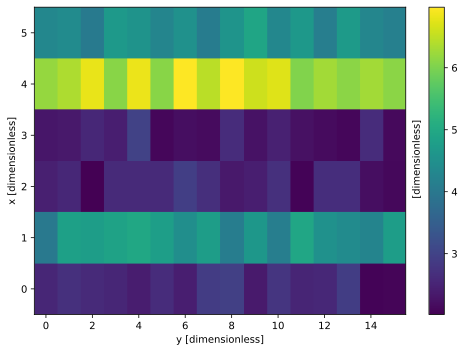

In [3]:
data = sc.DataArray(
    values,
    coords={
        'x': sc.Variable(['x'], values=np.arange(6)),
        'y': sc.Variable(['y'], values=np.arange(16))
    })
plot(data)

Note that we chose the "measured" values such that the three distinct values of the underlying parameter are visible.
We can now use the split-apply-combine mechanism to transform our data into a more useful representation.
We start by storing the parameter values (or any value to be used for grouping) as a non-dimension coordinate:

In [4]:
data.coords['param'] = param

Next, we call `scipp.groupby` to split the data and call `mean` on each of the groups:

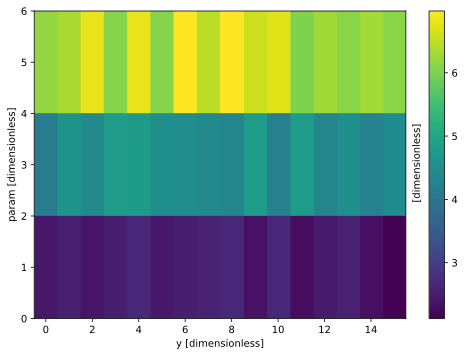

In [5]:
grouped = sc.groupby(data, group='param').mean('x')
plot(grouped)

Apart from `mean`, `groupby` currently also supports `sum` and `flatten`.
The latter is a sparse-data equivalent to summing dense data, i.e., histogramming flattened data is equivalent to summing histogrammed data.

## Grouping based on binned label values

Grouping based on non-dimension coordinate values (also known as labels) is most useful when labels are strings or integers.
If labels are floating-point values or cover a wide range, it is more convenient to group values into bins, i.e., all values within certain bounds are mapped into the same group.
We modify above example to use a contiuously-valued parameter:

In [6]:
param = sc.Variable(['x'], values=np.random.rand(16))
values = sc.Variable(['x', 'y'], values=np.random.rand(16,16))
values += 1.0 + 5.0*param

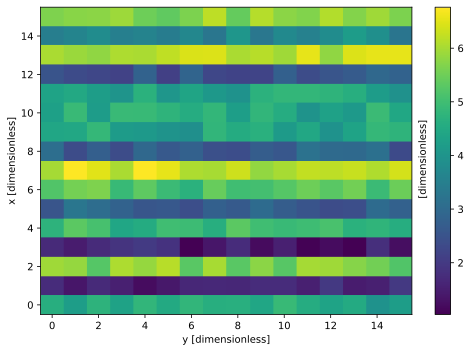

In [7]:
data = sc.DataArray(
    values,
    coords={
        'x': sc.Variable(['x'], values=np.arange(16)),
        'y': sc.Variable(['y'], values=np.arange(16))
    })
plot(data)

We create a variable defining the desired binning:

In [8]:
bins = sc.Variable(["z"], values=np.linspace(0.0, 1.0, 10))

As before, we can now use `groupby` and `mean` to transform the data:

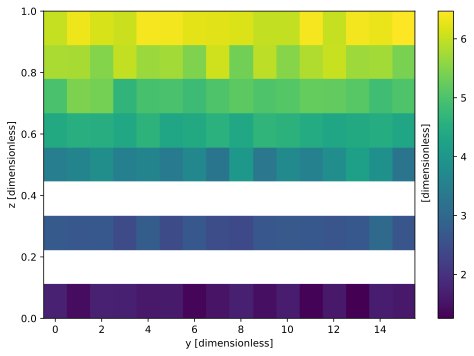

In [9]:
data.coords['param'] = param
grouped = sc.groupby(data, group='param', bins=bins).mean('x')
plot(grouped)

Note how some of the data values are now `NaN`.
This is the result of empty bins, which do not have a meaningful mean value.